In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel('/content/drive/MyDrive/AI Knowledge/MIAI_Customer_Segmentation-main/MIAI_Customer_Segmentation-main/data.xlsx')

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
from IPython.lib.security import random
# Loai bo cac gia tri NaN 
df_not_nan = df[df['CustomerID'].notna()]
df_not_nan = df_not_nan.sample(10000, random_state=42)
df_not_nan.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07 12:14:00,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15 13:51:00,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03 10:10:00,0.85,12921.0,United Kingdom
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04 13:56:00,1.65,17229.0,United Kingdom
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08 12:20:00,0.55,15144.0,United Kingdom
234751,557598,22558,CLOTHES PEGS RETROSPOT PACK 24,2,2011-06-21 11:33:00,1.65,14667.0,United Kingdom
283269,561704,21533,RETROSPOT LARGE MILK JUG,1,2011-07-29 11:07:00,4.95,14606.0,United Kingdom
532936,581001,22726,ALARM CLOCK BAKELIKE GREEN,24,2011-12-07 08:07:00,3.75,12583.0,France
78561,542890,84865,NEW BAROQUE BLACK PHOTO ALBUM,2,2011-02-01 13:25:00,8.50,15311.0,United Kingdom
424855,573287,21314,SMALL GLASS HEART TRINKET POT,8,2011-10-28 14:42:00,2.10,14194.0,United Kingdom


In [5]:
df_not_nan

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07 12:14:00,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15 13:51:00,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03 10:10:00,0.85,12921.0,United Kingdom
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04 13:56:00,1.65,17229.0,United Kingdom
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08 12:20:00,0.55,15144.0,United Kingdom
...,...,...,...,...,...,...,...,...
123,536381,22083,PAPER CHAIN KIT RETROSPOT,1,2010-12-01 09:41:00,2.95,15311.0,United Kingdom
449041,C575082,21843,RED RETROSPOT CAKE STAND,-4,2011-11-08 13:30:00,10.95,12613.0,Germany
425967,573340,21733,RED HANGING HEART T-LIGHT HOLDER,2,2011-10-30 11:55:00,2.95,14159.0,United Kingdom
70029,541997,22919,HERB MARKER MINT,5,2011-01-25 10:38:00,0.65,18077.0,United Kingdom


In [6]:
df_not_nan['InvoiceDate']

47912    2011-01-07 12:14:00
342630   2011-09-15 13:51:00
288183   2011-08-03 10:10:00
325368   2011-09-04 13:56:00
331450   2011-09-08 12:20:00
                 ...        
123      2010-12-01 09:41:00
449041   2011-11-08 13:30:00
425967   2011-10-30 11:55:00
70029    2011-01-25 10:38:00
282657   2011-07-28 15:55:00
Name: InvoiceDate, Length: 10000, dtype: datetime64[ns]

In [7]:
# Tinh Toan RFM

# Convert from String to Date 
# df_not_nan['InvoiceDate'] = df_not_nan['InvoiceDate'].dt.date

In [8]:
df_not_nan['InvoiceDate']

47912    2011-01-07 12:14:00
342630   2011-09-15 13:51:00
288183   2011-08-03 10:10:00
325368   2011-09-04 13:56:00
331450   2011-09-08 12:20:00
                 ...        
123      2010-12-01 09:41:00
449041   2011-11-08 13:30:00
425967   2011-10-30 11:55:00
70029    2011-01-25 10:38:00
282657   2011-07-28 15:55:00
Name: InvoiceDate, Length: 10000, dtype: datetime64[ns]

In [9]:
# Lay ngay lon nhat trong Invoice.. + 1
import datetime 
#  current_date = max(df_not_nan['InvoiceDate'])

In [10]:
b = np.array([1, 2, 3])

In [11]:
current_date = max(df_not_nan['InvoiceDate']) + datetime.timedelta(days = 1)
# Tính M - MoneytaryValue 
df_not_nan['TotalPay'] = df_not_nan['Quantity'] * df_not_nan['UnitPrice']

# Group by CustomerID de tinh R, F, M

df_customers = df_not_nan.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x: (current_date-x.max()).days,
     'InvoiceNo' : 'count',
     'TotalPay' : 'sum'  
    }
)

In [12]:
df_customers

,InvoiceDate,InvoiceNo,TotalPay
CustomerID,,,
12347.0,39,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,72,5,80.85
12354.0,232,2,33.30
...,...,...,...
18265.0,72,2,39.60
18272.0,2,11,206.17
18274.0,18,2,-4.65


In [13]:
df_customers.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo' : 'Fequency', 'TotalPay' : 'MonetaryValue'}, inplace=True)

In [14]:
# Ve phan phoi de kiem tra 

In [15]:
df_customers

,Recency,Fequency,MonetaryValue
CustomerID,,,
12347.0,39,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,72,5,80.85
12354.0,232,2,33.30
...,...,...,...
18265.0,72,2,39.60
18272.0,2,11,206.17
18274.0,18,2,-4.65


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


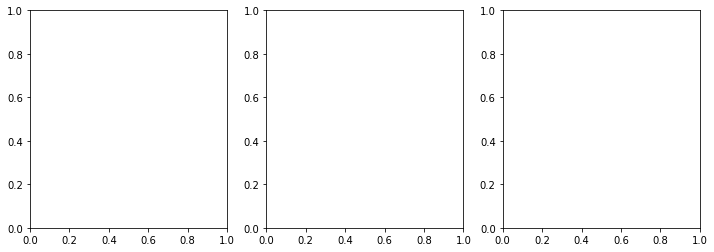

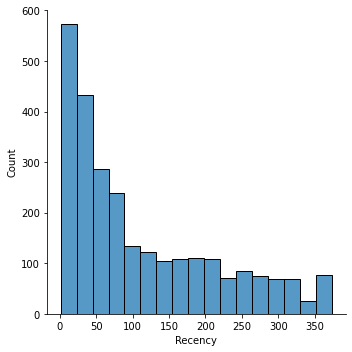

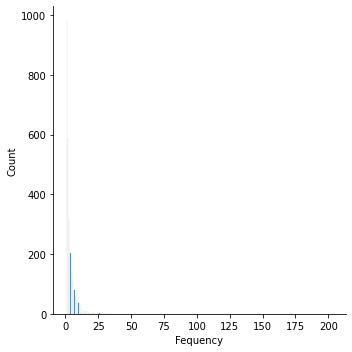

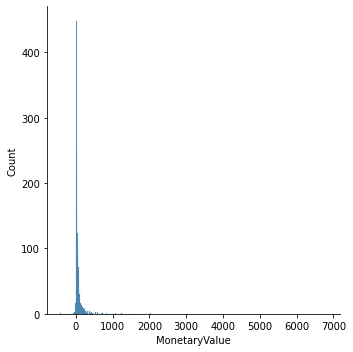

In [16]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))
sns.displot(df_customers['Recency'], ax = ax[0])
sns.displot(df_customers['Fequency'], ax = ax[1])
sns.displot(df_customers['MonetaryValue'], ax = ax[2])
plt.show()

In [17]:
# Su dung cac phuong phap transform de tim 
# ra phuong phap cho do lech thap nhat 
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_customers[x], ax=ax[0,0])
    sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df_customers[x].skew().round(2))
    print(np.log(df_customers[x]).skew().round(2))
    print(np.sqrt(df_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customers[x])[0]).skew().round(2))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

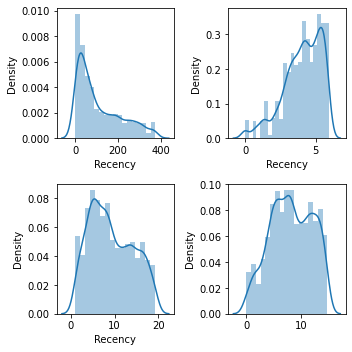

0.93
-0.83
0.31
-0.11


In [18]:
analyze_skewness('Recency')

In [28]:
# Tien Hanh Transform Data
df_customers_n = pd.DataFrame()
df_customers_n['Recency'] = stats.boxcox(df_customers['Recency'])[0]

In [29]:
df_customers_n['Fequency'] = stats.boxcox(df_customers['Fequency'])[0]
df_customers_n['MonetaryValue'] = pd.Series(np.cbrt(df_customers['MonetaryValue'])).values

In [30]:
df_customers_n.head(10)

,Recency,Fequency,MonetaryValue
0,6.285050,1.127547,5.107026
1,12.822038,0.591193,4.944452
2,4.514540,0.591193,6.787853
3,8.093846,1.127547,4.324076
4,12.507538,0.591193,3.217225
5,5.842330,1.017445,6.681810
6,10.722280,0.000000,4.308869
7,7.368815,0.857267,3.794637
8,9.629931,0.857267,3.220442
9,6.617486,0.000000,2.571282


In [31]:
# Scale du lieu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_customers_n)
df_customers_n = scaler.transform(df_customers_n)

In [32]:
pd.DataFrame(df_customers_n).head()

,0,1,2
0,-0.496913,1.012426,1.017503
1,1.234593,-0.017412,0.925115
2,-0.965883,-0.017412,1.972690
3,-0.017802,1.012426,0.572565
4,1.151289,-0.017412,-0.056441


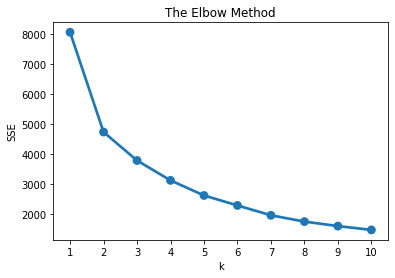

In [33]:
# Dua du lieu vao KNN

# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_n)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()